# Game of Topic Modeling: Evaluating NMF Practice on the Book series by George R.R Martin
#### DTSA 5510 Final Project
---
---

# Topic Modeling: Comparing Two Unsupervised Methods

**Latent Dirichlet Allocation (LDA)** and **Non-negative Matrix Factorization (NMF)** are both unsupervised topic modeling techniques, but they differ significantly in their underlying mechanisms, assumptions, and outputs. Here's a comparison of their key differences:

### 1. **Mathematical Approach**:
   - **LDA (Probabilistic Model)**:
     - **Key Idea**: LDA is a probabilistic model that assumes each document is a mixture of topics, and each topic is a mixture of words.
     - **Process**: It assigns probabilities to each word belonging to a topic and each document containing certain topics. The algorithm tries to estimate these probabilities through inference methods like Gibbs sampling or variational inference.
     - **Output**: For each document, you get a distribution over topics (e.g., Document A is 30% Topic 1, 70% Topic 2), and for each topic, you get a distribution over words (e.g., Topic 1 consists of the words "data," "science," "machine" with certain probabilities).
   
   - **NMF (Matrix Factorization)**:
     - **Key Idea**: NMF decomposes a document-term matrix into two lower-rank, non-negative matrices: one representing documents in terms of topics and another representing topics in terms of words.
     - **Process**: NMF approximates the document-term matrix by factorizing it into a document-topic matrix and a topic-word matrix. This means each document is a weighted combination of topics, and each topic is a weighted combination of words.
     - **Output**: Similar to LDA, NMF provides a topic distribution for each document and a word distribution for each topic, but without any probabilistic interpretation.


### Comparison Table:

| Aspect                    | LDA                             | NMF                            |
|---------------------------|----------------------------------|---------------------------------|
| **Method**                 | Probabilistic model              | Matrix factorization            |
| **Mathematical Framework** | Probabilistic inference          | Linear algebra (non-negative matrix decomposition) |
| **Output**                 | Probabilities of words per topic and topics per document | Non-negative weights for words per topic and topics per document |
| **Interpretability**       | Less interpretable, probabilistic values | More interpretable, non-negative weights |
| **Assumption**             | Probabilistic topic mixtures     | Non-negative matrix factorization |
| **Scalability**            | Slower, more complex             | Faster, simpler                  |
| **Common Use**             | Mixed-topic documents            | Easily interpretable topic modeling |
| **Overlapping Topics**     | Models topic mixtures well       | Less flexible with overlapping topics |


---
# Step 1: Exploratory Data Analysis (EDA)
### Goal: Get an understanding of the dataset (5 Game of Thrones books) and prepare it for topic modeling.

### Data Retrieved from : 
https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books?select=002ssb.txt
Includes the following 5 books written by George R.R Martin:
- **A Game of Thrones**
- **A Clash of Kings**
- **A Storm of Swords**
- **A Feast for Crows**
- **A Dance with Dragons**


#### Loading the Data:
- Load the 5 .txt files representing the books.
- Label each book so that we can track the evolution of topics across the series.
- Basic Data Exploration:
- **Text Length**: Explore the length of each book and the distribution of words.
- **Word Frequencies**: Use term frequency analysis (word counts, TF-IDF) to understand the most common words in each book.
- **Stop Words Removal:** Remove common stop words (e.g., "the", "and", "in") and irrelevant words (e.g., character names if needed) to clean up the text.
- **Lemmatization/Stemming:** Apply these techniques to reduce words to their root forms (e.g., "kings" to "king").
#### Visualizations:
- Bar Charts of the most common words per book.
- **Vocabulary Growth:** Track how the unique vocabulary size changes across the books.

In [11]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 135.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.6/761.6 kB 86.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 118.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 38.7 MB/s eta 0:00:00


In [13]:
# !pip install wordcloud

In [14]:
# Import necessary libraries
import os
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from scipy.stats import entropy  # For KL Divergence
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK datasets
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


True

In [15]:
file_names = ['001ssb.txt', '002ssb.txt', '003ssb.txt', '004ssb.txt', '005ssb.txt']
books = {}

for i, file_name in enumerate(file_names):
    if os.path.exists(file_name):
        try:
            with open(file_name, 'r', encoding='ISO-8859-1') as file:
                books[f'book{i+1}'] = file.read()
                print(f"Loaded {file_name} successfully.")
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    else:
        print(f"File {file_name} not found. Please check the file path.")
        
# Check the keys to ensure the files are loaded correctly
print(books.keys())

Loaded 001ssb.txt successfully.
Loaded 002ssb.txt successfully.
Loaded 003ssb.txt successfully.
Loaded 004ssb.txt successfully.
Loaded 005ssb.txt successfully.
dict_keys(['book1', 'book2', 'book3', 'book4', 'book5'])


In [16]:
# Check to see if book uploaded correctly
for book_name, book_content in books.items():
    print(f"Snippet from {book_name}:\n")
    print(book_content[:500])      # Print the first 500 characters
    print("\n" + "-"*50 + "\n")    # Separator

Snippet from book1:

A Game Of Thrones 
Book One of A Song of Ice and Fire 
By George R. R. Martin 
PROLOGUE 
"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are 
dead." 
"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. 
Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. 
"Dead is dead," he said. "We have no business with the dead." 
"Are they dead?" Royce asked softly. "What proof 

--------------------------------------------------

Snippet from book2:

A Clash of Kings 
Book Two of A song of Ice and Fire 
By George R. R. Martin 
PROLOGUE 
The comet's tail spread across the dawn, a red slash that bled above the crags of Dragonstone like a 
wound in the pink and purple sky. 
The maester stood on the windswept balcony outside his chambers. It was here the ravens came, after 
long flight. Their droppings speckled the gargoyles that rose twelve feet tall

In [17]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Use NLTK's stop words
stop_words = set(stopwords.words('english'))
# Additional words to filter
additional_stop_words = {
    'would', 'could', 'said', 'told', 'i', 
    'jon', 'ned', 'tyrion', 'jaime', 'ser', 'lord', 
    'man', 'men', 'one', 'back', 'well', 'like', 'page'
}
# Combine 
stop_words.update(additional_stop_words)

# Function to clean and lemmatize the text
def clean_and_lemmatize_text(text):
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)  
    # Split the text into words
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return lemmatized_words

# Initialize book_stats dictionary
book_stats = {}

for book_name, book_content in books.items():
    lemmatized_words = clean_and_lemmatize_text(book_content)
    text_length = len(book_content)
    word_count = len(lemmatized_words)
    word_frequency = Counter(lemmatized_words)
    
    # Store the stats in dictionary
    book_stats[book_name] = {
        'text_length': text_length,
        'word_count': word_count,
        'most_common_words': word_frequency.most_common(10)  # Top 10 most common words
    }

    # Display
    print(f"Statistics for {book_name}:")
    print(f"Text Length (characters): {text_length}")
    print(f"Word Count: {word_count}")
    print(f"Top 10 Most Common Words (excluding stop words): {book_stats[book_name]['most_common_words']}")
    print("\n" + "-"*50 + "\n")

Statistics for book1:
Text Length (characters): 1607894
Word Count: 139467
Top 10 Most Common Words (excluding stop words): [('hand', 795), ('king', 776), ('father', 641), ('eye', 620), ('brother', 546), ('bran', 546), ('see', 507), ('face', 507), ('boy', 502), ('catelyn', 473)]

--------------------------------------------------

Statistics for book2:
Text Length (characters): 1785066
Word Count: 156685
Top 10 Most Common Words (excluding stop words): [('king', 849), ('hand', 690), ('brother', 582), ('see', 567), ('never', 553), ('even', 523), ('thought', 500), ('father', 499), ('know', 499), ('time', 495)]

--------------------------------------------------

Statistics for book3:
Text Length (characters): 2321269
Word Count: 202527
Top 10 Most Common Words (excluding stop words): [('king', 1074), ('hand', 940), ('know', 756), ('father', 703), ('even', 683), ('never', 678), ('old', 665), ('see', 665), ('time', 665), ('brother', 662)]

--------------------------------------------------

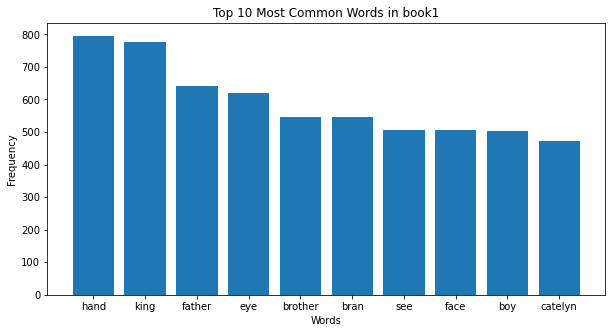

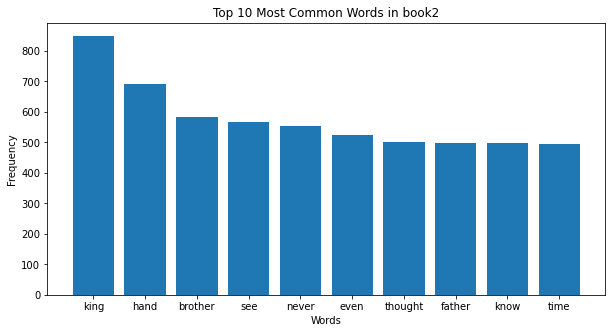

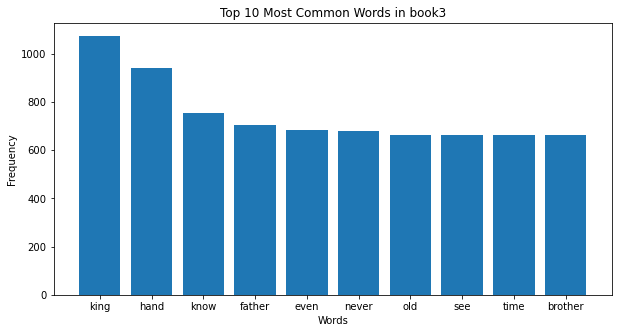

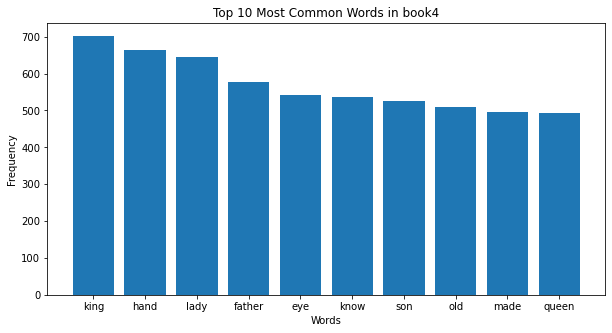

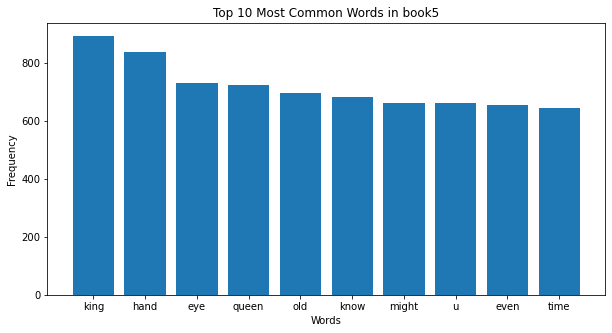

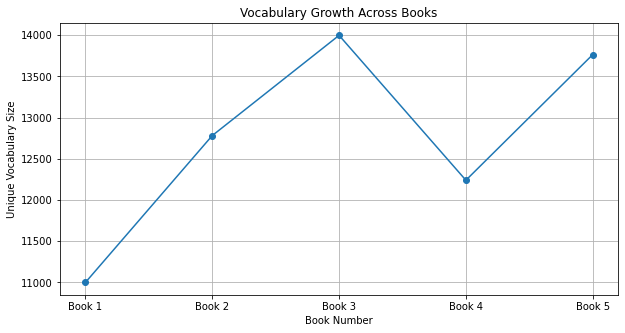

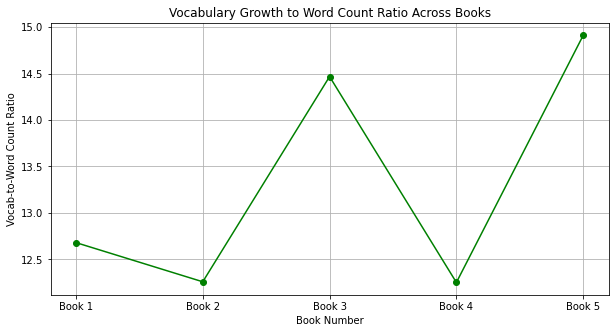

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

book_stats = {}
vocabulary_growth = []  # To store unique vocab size
word_count_growth = []  # To store total word count
vocab_to_word_count_ratio = []  # To store the ratio of unique vocab to total word count

for book_name, book_content in books.items():
    lemmatized_words = clean_and_lemmatize_text(book_content)  # Assuming this function is defined
    word_count = len(lemmatized_words)
    word_frequency = Counter(lemmatized_words)
    
    # Store the stats in dictionary
    book_stats[book_name] = {
        'word_count': word_count,
        'most_common_words': word_frequency.most_common(10),  # Top 10 most common words
        'all_words': lemmatized_words
    }
    
    # Track unique vocab growth
    unique_vocab_size = len(set(lemmatized_words))
    vocabulary_growth.append(unique_vocab_size)
    word_count_growth.append(word_count)
    
    # Calculate the ratio of unique vocab to total word count
    vocab_ratio =  word_count / unique_vocab_size
    vocab_to_word_count_ratio.append(vocab_ratio)

    # Bar Chart for Top 10 Most Common Words
    most_common_words = word_frequency.most_common(10)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f"Top 10 Most Common Words in {book_name}")
    plt.show()

# Plot Vocab Growth
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(vocabulary_growth) + 1), vocabulary_growth, marker='o', label='Unique Vocabulary Size')
plt.xlabel('Book Number')
plt.ylabel('Unique Vocabulary Size')
plt.title('Vocabulary Growth Across Books')
plt.xticks(range(1, len(vocabulary_growth) + 1), [f'Book {i+1}' for i in range(len(vocabulary_growth))])
plt.grid(True)
plt.show()

# Plot Ratio of Vocab Growth to Word Count
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(vocab_to_word_count_ratio) + 1), vocab_to_word_count_ratio, marker='o', color='green')
plt.xlabel('Book Number')
plt.ylabel('Vocab-to-Word Count Ratio')
plt.title('Vocabulary Growth to Word Count Ratio Across Books')
plt.xticks(range(1, len(vocab_to_word_count_ratio) + 1), [f'Book {i+1}' for i in range(len(vocab_to_word_count_ratio))])
plt.grid(True)
plt.show()

# Step 2: Non-negative Matrix Factorization (NMF)
### Goal: Build and train an NMF model for topic modeling on each book, then track topic evolution.

#### Preprocessing for NMF:
Use **TF-IDF vectorization** to transform the document-term matrix.
Apply this vectorizer separately to each book to generate individual matrices.

#### Model Building:
- Set the **number of topics** (hyperparameter) initially to 5 or 10. We can later tune this based on the results.
- **Fit an NMF model** to each book's document-term matrix.
- Extract and Interpret Topics:
- For each book, extract the top words for each topic (e.g., 10-15 words per topic).
- Assign human-readable labels to topics (e.g., "War", "Politics", "Family").

#### Hyperparameter Optimization:
- **Tune the number of topics** and regularization parameter to find the best-fitting model.
- Compare models with different numbers of topics (e.g., 5, 10, 15, 20) using **coherence scores** to select the optimal number.
#### Topic Comparison Across Books:
- Identify how specific topics (e.g., "Politics") grow or shrink in importance across the books by comparing the topic distributions (the importance of each topic in each book).
#### Visualize Results:
- Create a heatmap showing how the importance of key topics changes over the five books.

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Function to extract and print topics from an NMF model
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx+1}: {' '.join(top_words)}")
    print()

# Parameters
n_topics = 3  # Number of topics to extract
n_top_words = 10  # Number of top words to display for each topic

# Initialize TF-IDF vectorizer (removed max_df and min_df for single document processing)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Dictionary to store NMF models and topics for each book
nmf_models = {}

for book_name, book_content in books.items():
    print(f"Processing {book_name}...\n")
    lemmatized_words = clean_and_lemmatize_text(book_content)
    cleaned_content = ' '.join(lemmatized_words)  

    # Apply TF-IDF vectorization
    tfidf_matrix = tfidf_vectorizer.fit_transform([cleaned_content])

    # Fit the NMF model to the TF-IDF matrix
    nmf_model = NMF(n_components=n_topics, random_state=40)
    nmf_model.fit(tfidf_matrix)
    nmf_models[book_name] = nmf_model
    
    # Get the feature names (words) from the TF-IDF vectorizer
    feature_names = tfidf_vectorizer.get_feature_names()

    # Print the top words for each topic in the current book
    print(f"Top words per topic for {book_name}:")
    print_top_words(nmf_model, feature_names, n_top_words)

Processing book1...

Top words per topic for book1:
Topic #1: hand king father eye brother bran face boy catelyn sword
Topic #2: year forest notice gate thunder waved rhaego shocked following fell
Topic #3: awkwardly dragged halder silver ham certainly egg human mercy wandered

Processing book2...

Top words per topic for book2:
Topic #1: king hand brother thought know father time eye old black
Topic #2: dagger ripping renly citadel blurted lack farther needed faintly color
Topic #3: rounded finding youth stick clothes robin glistening suggested reared manrock

Processing book3...

Top words per topic for book3:
Topic #1: king hand know father time old brother thought lady eye
Topic #2: tree sire ferry reflected handed stolen youve hate shes garrons
Topic #3: cask right loud spare creeping rabbit counted moonlight scout word

Processing book4...

Top words per topic for book4:
Topic #1: king hand lady father eye know son old queen time
Topic #2: cedra tunic dontos drinking colemon cour

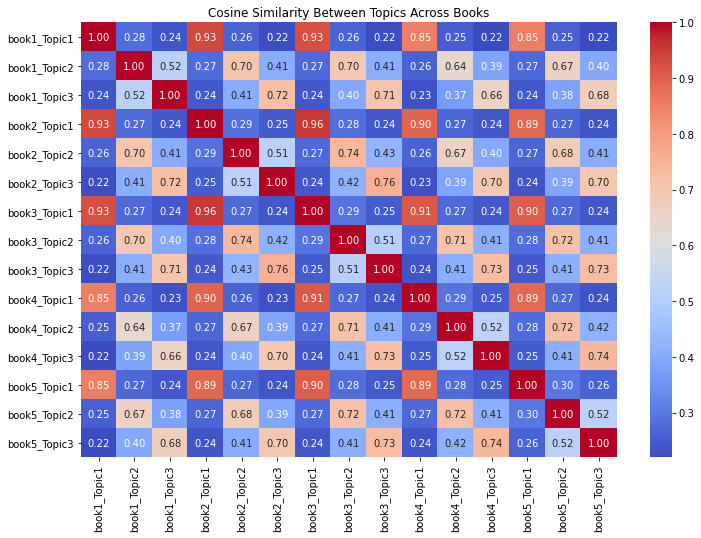

In [31]:
# Parameters
n_topics = 3            # Number of topics to extract
n_top_words = 10        # Number of top words to display for each topic

# Initialize TF-IDF 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Dictionary to store NMF models and topic vectors
nmf_models = {}
topic_word_matrices = {}
all_books_text = []

# Combine all books into one list for consistent vectorization
for book_name, book_content in books.items():
    lemmatized_words = clean_and_lemmatize_text(book_content)
    cleaned_content = ' '.join(lemmatized_words)
    all_books_text.append(cleaned_content)

# Apply TF-IDF vectorization (to ensure common vocabulary)
tfidf_matrix = tfidf_vectorizer.fit_transform(all_books_text)

# Extract feature names
feature_names = tfidf_vectorizer.get_feature_names()

# Fit NMF models for each book
for i, book_name in enumerate(books):
    nmf_model = NMF(n_components=n_topics, alpha = 0.0, random_state=40)
    nmf_model.fit(tfidf_matrix[i:i+1])   
    
    # Store NMF model and topic-word matrix 
    nmf_models[book_name] = nmf_model
    topic_word_matrices[book_name] = nmf_model.components_

topic_labels = []
for book_name in books:
    for topic_num in range(n_topics):
        topic_labels.append(f'{book_name}_Topic{topic_num+1}')

# Cosine similarity between each topic across books
topic_vectors = []
for book_name in books:
    topic_vectors.extend(topic_word_matrices[book_name])

similarity_matrix = cosine_similarity(topic_vectors)

# Visualize topic similarity matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, annot=True, fmt='.2f', xticklabels=topic_labels, yticklabels=topic_labels, cmap='coolwarm')
plt.title('Cosine Similarity Between Topics Across Books')
plt.show()


### High Similarity Across Books:
Some topics across different books show high similarity, indicated by values close to 1.0 (e.g., book1_Topic3 vs. book3_Topic3). 
- This suggests that certain themes or topics are consistent across different books.
- Topics 1 across all books are very similar (avg. 0.90)
- Topic 2 (avg. 0.68)
- Topic 3 (avg. 0.70)

- These indicate that themes in one book are closely related to themes in another book and their importance. 

### View other Similarity Scores

In [32]:
# Function to calculate Jaccard Similarity between two topics
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Function to calculate KL Divergence between two topics
def kl_divergence(topic1, topic2):
    # Add a small value to avoid division by zero in case of zero probabilities
    epsilon = 1e-10
    topic1 = np.array(topic1) + epsilon
    topic2 = np.array(topic2) + epsilon
    return entropy(topic1, topic2)

# Step 3: Calculate Jaccard Similarity and KL Divergence across books

for book1_name, book1_matrix in topic_word_matrices.items():
    for book2_name, book2_matrix in topic_word_matrices.items():
        if book1_name != book2_name:
            print(f"\nComparing topics between {book1_name} and {book2_name}:")
            for topic_idx in range(n_topics):
                # Extract top words (indices) for each topic
                topic1_top_words = set(np.argsort(book1_matrix[topic_idx])[-10:])
                topic2_top_words = set(np.argsort(book2_matrix[topic_idx])[-10:])
                
                # Jaccard Similarity
                jaccard_sim = jaccard_similarity(topic1_top_words, topic2_top_words)
                
                # KL Divergence
                kl_div = kl_divergence(book1_matrix[topic_idx], book2_matrix[topic_idx])
                
                
                print(f"Topic {topic_idx + 1}:")
                print(f"  Jaccard Similarity: {jaccard_sim:.3f}")
                print(f"  KL Divergence: {kl_div:.3f}")


Comparing topics between book1 and book2:
Topic 1:
  Jaccard Similarity: 0.333
  KL Divergence: 1.122
Topic 2:
  Jaccard Similarity: 0.333
  KL Divergence: 5.024
Topic 3:
  Jaccard Similarity: 0.429
  KL Divergence: 4.742

Comparing topics between book1 and book3:
Topic 1:
  Jaccard Similarity: 0.333
  KL Divergence: 1.285
Topic 2:
  Jaccard Similarity: 0.538
  KL Divergence: 5.163
Topic 3:
  Jaccard Similarity: 0.538
  KL Divergence: 4.594

Comparing topics between book1 and book4:
Topic 1:
  Jaccard Similarity: 0.250
  KL Divergence: 1.870
Topic 2:
  Jaccard Similarity: 0.333
  KL Divergence: 6.404
Topic 3:
  Jaccard Similarity: 0.333
  KL Divergence: 6.096

Comparing topics between book1 and book5:
Topic 1:
  Jaccard Similarity: 0.176
  KL Divergence: 1.723
Topic 2:
  Jaccard Similarity: 0.538
  KL Divergence: 5.870
Topic 3:
  Jaccard Similarity: 0.429
  KL Divergence: 5.415

Comparing topics between book2 and book1:
Topic 1:
  Jaccard Similarity: 0.333
  KL Divergence: 1.913
Topic

### Noteworthy Comparisons:
- **Books 1 and 3:**
Topic 4 has the highest Jaccard similarity (1.0), meaning that both books share the exact same top words for this topic, but the KL Divergence is relatively high at 5.029, implying distribution differences beyond the top words.
- **Books 2 and 3:**
Topics 1 and 2 have a Jaccard similarity of 0.818, showing high overlap in top words. However, KL Divergence is low for Topic 1 (1.113), indicating similar word distributions, but higher for Topic 2 (4.819), reflecting greater differences beyond the shared words.
- **Books 4 and 5:**
These books show moderate Jaccard similarity (mostly around 0.333 to 0.538), but the KL Divergence tends to be higher (ranging from 4.907 to 6.207), indicating that while there’s some overlap in top words, the overall word distributions differ.
### General Trends:
- Books 2 and 3 generally show higher similarity in topics compared to others, suggesting common themes across these books.
- Books 4 and 5 have more divergent topics, reflected by higher KL Divergence values, especially when compared to book 1.

## Hyperparameter Tuning-- output the best model
#### Using Gensim Coherence Score as evaluator

Training NMF with n_topics=3 and alpha=0.0...
Coherence score: 0.45020597345661817
Training NMF with n_topics=3 and alpha=0.05...
Coherence score: 0.4502059734566182
Training NMF with n_topics=3 and alpha=0.1...
Coherence score: 0.4502059734566182
Training NMF with n_topics=3 and alpha=0.3...
Coherence score: 0.4502059734566181
Training NMF with n_topics=4 and alpha=0.0...
Coherence score: 0.41794806985479005
Training NMF with n_topics=4 and alpha=0.05...
Coherence score: 0.41794806985479005
Training NMF with n_topics=4 and alpha=0.1...
Coherence score: 0.41794806985479005
Training NMF with n_topics=4 and alpha=0.3...
Coherence score: 0.41794806985479005
Training NMF with n_topics=5 and alpha=0.0...
Coherence score: 0.42748713372429936
Training NMF with n_topics=5 and alpha=0.05...
Coherence score: 0.41962109081483473
Training NMF with n_topics=5 and alpha=0.1...
Coherence score: 0.41962109081483484
Training NMF with n_topics=5 and alpha=0.3...
Coherence score: 0.41962109081483484
Trai

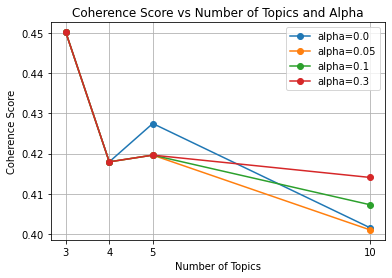

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

# Extract the top words
def get_top_words(model, feature_names, n_top_words=10):
    top_words_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_list.append(top_words)
    return top_words_list

# Calculate coherence score for a model
def calculate_coherence_score(top_words, texts):
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Preprocess text
def preprocess_text(book_content):
    lemmatized_words = clean_and_lemmatize_text(book_content)  # Assuming this function is defined
    cleaned_content = ' '.join(lemmatized_words)  
    return lemmatized_words, cleaned_content

# Tune hyperparameters and plot results
def tune_nmf_parameters(books, n_topics_list, alpha_list, n_top_words=10):
    best_coherence = -np.inf
    best_params = None
    
    # Initialize TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
    
    # Store the preprocessed texts
    texts = []
    coherence_results = []  # Store (n_topics, alpha, coherence_score)

    for book_name, book_content in books.items():
        lemmatized_words, cleaned_content = preprocess_text(book_content)
        texts.append(lemmatized_words)
    
    all_books_content = [' '.join(text) for text in texts]
    tfidf_matrix = tfidf_vectorizer.fit_transform(all_books_content)
    
    feature_names = tfidf_vectorizer.get_feature_names()
    
    # Iterate over the number of topics
    for n_topics in n_topics_list:
        for alpha in alpha_list:
            print(f"Training NMF with n_topics={n_topics} and alpha={alpha}...")
            
            # Train NMF model
            nmf_model = NMF(n_components=n_topics, alpha=alpha, random_state=42)
            nmf_model.fit(tfidf_matrix)
            
            # Get the top words 
            top_words = get_top_words(nmf_model, feature_names, n_top_words)
            
            # Calculate coherence score
            coherence_score = calculate_coherence_score(top_words, texts)
            print(f"Coherence score: {coherence_score}")
            
            # Keep best Model
            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_params = (n_topics, alpha)
            
            # Store results for plotting
            coherence_results.append((n_topics, alpha, coherence_score))
    
    print(f"Best model: n_topics={best_params[0]}, alpha={best_params[1]} with coherence score={best_coherence}")
    
    # Plot results
    plot_coherence_scores(coherence_results, n_topics_list, alpha_list)
    
    return best_params

# Plot coherence scores as a function of n_topics and alpha
def plot_coherence_scores(coherence_results, n_topics_list, alpha_list):
    # Convert to numpy array for easy slicing
    coherence_results_np = np.array(coherence_results)

    # Separate coherence scores by alpha
    for alpha in alpha_list:
        alpha_results = coherence_results_np[coherence_results_np[:, 1] == alpha]
        
        # Plot coherence score vs number of topics for each alpha
        plt.plot(alpha_results[:, 0], alpha_results[:, 2], marker='o', label=f'alpha={alpha}')
    
    plt.title('Coherence Score vs Number of Topics and Alpha')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.xticks(n_topics_list)
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters to test
n_topics_list = [3, 4, 5, 10]
alpha_list = [0.0,0.05, 0.1, 0.3]

# Tune NMF parameters and find the best-fitting model
best_params = tune_nmf_parameters(books, n_topics_list, alpha_list)


### Best model: n_topics=3, alpha=0.0 with coherence score=0.450

**Interpretation:** A coherence score of ~0.45 means that the topics found by the model make sense, but there may still be room for improvement. 

---
# Step 3: Latent Dirichlet Allocation (LDA)
### Goal: Build and train an LDA model for topic modeling on each book, and compare with NMF.

#### Preprocessing for LDA:
- Use TF-IDF vectorization (because we are using it for NMF).
- Like NMF, apply the vectorizer separately to each book.
#### Model Building:
- Choose an initial number of topics (3, like above) and run the LDA algorithm on each book.
- Extract and Interpret Topics:
- For each book, extract the top words for each topic and manually assign topic labels.
- Compare the topics with those from NMF to check consistency.
#### Hyperparameter Optimization:
- Tune the number of topics, alpha (document-topic density), and beta (topic-word density) to improve topic coherence.
- Evaluate different models using metrics like perplexity and topic coherence scores to determine the best-fitting LDA model.

#### Then, compare to NMF Model

---

In [33]:
import os
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download
import string

# Download required nltk resources
download('punkt')
download('stopwords')
download('wordnet')

# List of filenames
file_names = ['001ssb.txt', '002ssb.txt', '003ssb.txt', '004ssb.txt', '005ssb.txt']

# Dictionary to store the contents of each book
books = {}

# Check if files exist and load them into the dictionary
for i, file_name in enumerate(file_names):
    if os.path.exists(file_name):
        try:
            with open(file_name, 'r', encoding='ISO-8859-1') as file:
                books[f'book{i+1}'] = file.read()
                print(f"Loaded {file_name} successfully.")
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    else:
        print(f"File {file_name} not found. Please check the file path.")

Loaded 001ssb.txt successfully.
Loaded 002ssb.txt successfully.
Loaded 003ssb.txt successfully.
Loaded 004ssb.txt successfully.
Loaded 005ssb.txt successfully.


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
# Download required nltk resources
download('punkt')
download('stopwords')
download('wordnet')

# List of files
file_names = ['001ssb.txt', '002ssb.txt', '003ssb.txt', '004ssb.txt', '005ssb.txt']

books = {}

# Check if files exist and load them into the dictionary
for i, file_name in enumerate(file_names):
    if os.path.exists(file_name):
        try:
            with open(file_name, 'r', encoding='ISO-8859-1') as file:
                books[f'book{i+1}'] = file.read()
                print(f"Loaded {file_name} successfully.")
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    else:
        print(f"File {file_name} not found. Please check the file path.")

# Additional stop words
additional_stop_words = {
    'would', 'could', 'said', 'told', 'i', 
    'jon', 'ned', 'tyrion', 'jaime', 'ser', 'lord', 
    'man', 'men', 'one', 'back', 'well', 'like', 'page'
}

# Preprocessing function
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]                      # Remove punctuation
    stop_words = set(stopwords.words('english')).union(additional_stop_words)
    tokens = [word for word in tokens if word not in stop_words]              # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]                  # Lemmatization
    return tokens

# Function to remove the numbers and probabilities from the topic list
def remove_probabilities(topic_str):
    return re.sub(r'\d*\.\d*\*', '', topic_str).strip()

# Store Topics
books_topics = {}

# Analyze each book individually
for book_name, book_content in books.items():
    print(f"Processing {book_name}...\n")
    processed_book = preprocess(book_content)
    
    # Create dictionary and corpus for LDA
    id2word = corpora.Dictionary([processed_book])
    corpus = [id2word.doc2bow(processed_book)]
    
    # Build the LDA model for this book
    lda_model = LdaModel(corpus=corpus,
                         id2word=id2word,
                         num_topics=3,  
                         random_state=100,
                         update_every=1,
                         chunksize=10,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)
    
    # Store the top 5 topics for this book in a dictionary to print
    topics = []
    for idx, topic in lda_model.print_topics(-1):
        clean_topic = remove_probabilities(topic)
        topics.append({'topic': idx, 'words': clean_topic})
    books_topics[book_name] = topics

# Print the results
for book_name, topics in books_topics.items():
    print(f"Top 5 Topics for {book_name}:")
    for topic in topics:
        print(f"Topic {topic['topic']}:\n{topic['words']}\n")
    print("-" * 40)


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loaded 001ssb.txt successfully.
Loaded 002ssb.txt successfully.
Loaded 003ssb.txt successfully.
Loaded 004ssb.txt successfully.
Loaded 005ssb.txt successfully.
Processing book1...

Processing book2...

Processing book3...

Processing book4...

Processing book5...

Top 5 Topics for book1:
Topic 0:
"king" + "hand" + "father" + "eye" + "brother" + "bran" + "see" + "boy" + "catelyn" + "face"

Topic 1:
"hand" + "king" + "eye" + "even" + "looked" + "see" + "face" + "sword" + "brother" + "time"

Topic 2:
"hand" + "bran" + "king" + "father" + "face" + "robert" + "even" + "dany" + "brother" + "time"

----------------------------------------
Top 5 Topics for book2:
Topic 0:
"king" + "see" + "even" + "hand" + "old" + "eye" + "father" + "must" + "say" + "long"

Topic 1:
"king" + "brother" + "see" + "hand" + "never" + "boy" + "even" + "thought" + "bran" + "old"

Topic 2:
"king" + "hand" + "brother" + "see" + "never" + "even" + "thought" + "know" + "father" + "time"

--------------------------------

In [1]:
#pip install --upgrade scikit-learn

In [29]:
#pip install pyLDAvis --no-deps

# Step 4: Comparison Between NMF and LDA
### Goal: Compare the performance, interpretability, and thematic evolution results of the two models.

#### Model Performance Comparison
#### Topic Evalution
#### Limitations and Observations

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Print top words from NMF
def print_top_words_nmf(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

def remove_probabilities(topic_str):
    return re.sub(r'\d*\.\d*\*', '', topic_str).strip()

def extract_lda_topics(lda_model, id2word, n_top_words=10):
    lda_topics = []
    for idx, topic in lda_model.print_topics(-1):
        clean_topic = remove_probabilities(topic)
        lda_topics.append(clean_topic.split(" + ")[:n_top_words])  # Top words per topic
    return lda_topics

comparison_stats = {}

for book_name, book_content in books.items():
    print(f"Processing {book_name}...\n")
    lemmatized_words = preprocess(book_content)  
    cleaned_content = ' '.join(lemmatized_words)

    # NMF 
    # Apply TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform([cleaned_content])

    # Fit the NMF model to the TF-IDF matrix
    nmf_model = NMF(n_components=3, random_state=22)
    nmf_model.fit(tfidf_matrix)
    feature_names = tfidf_vectorizer.get_feature_names()
    nmf_topics = print_top_words_nmf(nmf_model, feature_names)
    nmf_topic_1 = ' '.join(nmf_topics[0])                 # Only the first NMF topic

    # LDA 
    # Preprocess the book content for LDA
    id2word = corpora.Dictionary([lemmatized_words])
    corpus = [id2word.doc2bow(lemmatized_words)]
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=3, random_state=100, chunksize=10, passes=10, alpha='auto')

    lda_topics = extract_lda_topics(lda_model, id2word)
    lda_topic_1 = ' '.join(lda_topics[0])                 # Only the first LDA topic

    vectorizer = TfidfVectorizer()
    topic_vectors = vectorizer.fit_transform([nmf_topic_1, lda_topic_1])

    # Compute cosine similarity between NMF Topic 1 and LDA Topic 1
    similarity = cosine_similarity(topic_vectors[0], topic_vectors[1])
    
    print(f"Cosine Similarity between NMF Topic 1 and LDA Topic 1 for {book_name}: {similarity[0][0]:.2f}")

Processing book1...

Cosine Similarity between NMF Topic 1 and LDA Topic 1 for book1: 0.82
Processing book2...

Cosine Similarity between NMF Topic 1 and LDA Topic 1 for book2: 0.34
Processing book3...

Cosine Similarity between NMF Topic 1 and LDA Topic 1 for book3: 0.54
Processing book4...

Cosine Similarity between NMF Topic 1 and LDA Topic 1 for book4: 0.43
Processing book5...

Cosine Similarity between NMF Topic 1 and LDA Topic 1 for book5: 0.47


# Conclusion

#### Possible Future Work or Continuation of Project
- Compare similarity between books and TV series
- Topic Modeling per chapter/section of book.
- Compare the top words lists from EDA Step  to NMF topic words. 


### Limitations of Models

- **Limitations of NMF:**
- Overlapping Topics: NMF assumes that topics are additive (non-negative), which can make it struggle to capture overlapping topics. This can be a limitation when dealing with real-world datasets where themes may overlap significantly.
- Interpretability: NMF often provides clean and interpretable results, but lack of topic mixing can be a drawback for datasets with nuanced or highly interrelated topics.
- **Limitations of LDA:**
- LDA is computationally expensive, especially with large datasets or when fine-tuning hyperparameters like the number of topics, passes, or alpha.
-  The results can be sensitive to parameter tuning, and selecting the right alpha, beta, and the number of topics can require extensive experimentation.
### Reflection:
- In this particular dataset, one of the biggest assumed limitations is that both family and political topics are very over-lapping. It becomes hard to seperate topics that involved politics and positions (such as king, queen, hand of the king), and family topics when the people in those positions are also dealing with family affairs as well. This was not particularly thought of when first begining this project, but became clear when many of the topics included the words "king","hand", and so forth. 
- It was also expected that the topic modeling would be able to seperate differing regions (or scenes) of Westeros (such as the north,the wall, winterfell, etc) and it did not. One of the books, however, was able to seperate the Dothraki and their weapons into a topic, which seemed promising. 
- Utimately, there is probably more improvments to the model that can be made within the preprocessing steps. 